# Experiment Overview

The goal of this experiment is to measure ACE (Accuracy and Consistency Eval) with MMLU-Pro (no math) on a handful of SoTA LLMs, varying temperature.

Prompt: 0-shot, with CoT

## Models

OpenAI:
- gpt-4o
- gpt-4o-mini
- o1-preview
- o1-mini

Anthropic:
- claude-3.5-sonnet
- claude-3-haiku
- claude-3-opus (excluded due to cost)

Google:
- gemini-flash
- gemini-pro

Meta:
- llama-3.1-8b
- llama-3.1-70b
- llama-3.1-405b

## Temperature

- 0
- 0.5
- 1
- 1.5
- 2

## Trials

5

# Deliverables

## UI

Slider on k, with a graph that animates ranking according to the slider.

0 (superscore) -> k=5 (subscore)

Graph should look like Artificial Analysis, hopefully

## Table

Model, temperature, k=0, k=1, k=2, k=3, k=4, k=5, accuracies (3), mean_response_lengths (3), parseableness (3)

## Costs calculation.

# Plan

Start with n=10 on MMLU-Pro (no math), generate with all LLMs.
Analyze.

Scale to n=100 on MMLU-Pro (no math), generate with all LLMs
Analyze.

# Load Data

In [5]:
from datasets import load_dataset

dataset = load_dataset("sam-paech/mmlu-pro-nomath-sml")

df_ground_truth = dataset["test"].to_pandas()

# Generate requests

In [10]:
import jsonlines
import os

from llm_council.processors.council_service import (
    get_default_council_service,
    CouncilService,
)

NUM_EXAMPLES = 10

CHOICE_MAP = {
    0: "A",
    1: "B",
    2: "C",
    3: "D",
    4: "E",
    5: "F",
    6: "G",
    7: "H",
    8: "I",
    9: "J",
    10: "K", 
    11: "L", 
    12: "M", 
}

def get_options_string(options):
    str = ""
    option_strings = []
    for i, option in enumerate(options):
        option_strings.append(f"{CHOICE_MAP[i]}: {option}")
    return ", ".join(option_strings)
    

def get_answer_string(options, answer_index):
    return CHOICE_MAP[answer_index] + ": " + options[answer_index]
    

PROMPT_ANSWER_COT_FIRST = '''The following is a multiple-choice question (with potential answers). Think step by step and then finish your answer with "The answer is (X)" where X is the correct letter choice.

Question: {question}

Options: {options}
'''

PROMPT_MAP = {
    "pr_ans_cot1": PROMPT_ANSWER_COT_FIRST,
}


def generate_requests(
    prompt_name,
    should_judge_ground_truth,
    temperature,
    llm_council_members,
    base_outdir,
    schema_name=None,
    role=None,
):
    base_prompt = PROMPT_MAP[prompt_name]
    outdir = os.path.join(
        base_outdir, 
        ".".join([
            prompt_name,
            schema_name if schema_name else "no_schema",
            f"temp{str(temperature).replace(".", "")}",
            role if role else "no_role",
    ]))
    
    council_service = CouncilService(
        llm_council_members=llm_council_members,
        outdir=outdir,
    )

    if NUM_EXAMPLES:
        data = df_ground_truth.head(NUM_EXAMPLES)
    else:
        data = df_ground_truth

    for i, row in data.iterrows():
        realized_prompt = base_prompt.format(
            role=role,
            question=row.question,
            options=get_options_string(row.options),
            answer=get_answer_string(row.options, row.answer_index)
        )
        metadata = {
            "completion_request": {
                "question_id": row["question_id"],
                "temperature": temperature,
                "schema_name": schema_name,
                "should_judge_ground_truth": should_judge_ground_truth,
                "role": role,
            }
        }
        council_service.write_council_request(
            realized_prompt, metadata, temperature, schema_name=schema_name,
        )


def generate_all_requests(base_dir, num_trials):
    for i in range(num_trials):
        base_outdir = os.path.join(base_dir, f"run_{i}")
        # PROMPT_ANSWER_COT_FIRST
        generate_requests(
            prompt_name="pr_ans_cot1",
            should_judge_ground_truth=False,
            temperature=0,
            base_outdir=base_outdir,
            llm_council_members=[
                "openai://gpt-4o-mini-2024-07-18", 
                "openai://gpt-4o-2024-08-06",
                # "openai://o1-preview-2024-09-12",
                # "openai://o1-mini-2024-09-12",
                "anthropic://claude-3-5-sonnet-20240620",
                "anthropic://claude-3-haiku-20240307",
                "vertex://gemini-1.5-pro-001",
                "vertex://gemini-1.5-flash-001",
                "together://meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo",
                "together://meta-llama/Meta-Llama-3.1-70B-Instruct-Turbo",
            ],
        )
        
        generate_requests(
            prompt_name="pr_ans_cot1",
            should_judge_ground_truth=False,
            temperature=0.25,
            base_outdir=base_outdir,
            llm_council_members=[
                "openai://gpt-4o-mini-2024-07-18", 
                "openai://gpt-4o-2024-08-06",
                # "openai://o1-preview-2024-09-12",
                # "openai://o1-mini-2024-09-12",
                "anthropic://claude-3-5-sonnet-20240620",
                "anthropic://claude-3-haiku-20240307",
                "vertex://gemini-1.5-pro-001",
                "vertex://gemini-1.5-flash-001",
                "together://meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo",
                "together://meta-llama/Meta-Llama-3.1-70B-Instruct-Turbo",
            ],
        )
        
        generate_requests(
            prompt_name="pr_ans_cot1",
            should_judge_ground_truth=False,
            temperature=0.5,
            base_outdir=base_outdir,
            llm_council_members=[
                "openai://gpt-4o-mini-2024-07-18", 
                "openai://gpt-4o-2024-08-06",
                "openai://o1-preview-2024-09-12",
                "openai://o1-mini-2024-09-12",
                "anthropic://claude-3-5-sonnet-20240620",
                "anthropic://claude-3-haiku-20240307",
                "vertex://gemini-1.5-pro-001",
                "vertex://gemini-1.5-flash-001",
                "together://meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo",
                "together://meta-llama/Meta-Llama-3.1-70B-Instruct-Turbo",
            ],
        )
        
        generate_requests(
            prompt_name="pr_ans_cot1",
            should_judge_ground_truth=False,
            temperature=0.75,
            base_outdir=base_outdir,
            llm_council_members=[
                "openai://gpt-4o-mini-2024-07-18", 
                "openai://gpt-4o-2024-08-06",
                # "openai://o1-preview-2024-09-12",
                # "openai://o1-mini-2024-09-12",
                "anthropic://claude-3-5-sonnet-20240620",
                "anthropic://claude-3-haiku-20240307",
                "vertex://gemini-1.5-pro-001",
                "vertex://gemini-1.5-flash-001",
                "together://meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo",
                "together://meta-llama/Meta-Llama-3.1-70B-Instruct-Turbo",
            ],
        )
        
        generate_requests(
            prompt_name="pr_ans_cot1",
            should_judge_ground_truth=False,
            temperature=1,
            base_outdir=base_outdir,
            llm_council_members=[
                "openai://gpt-4o-mini-2024-07-18", 
                "openai://gpt-4o-2024-08-06",
                "openai://o1-preview-2024-09-12",
                "openai://o1-mini-2024-09-12",
                "anthropic://claude-3-5-sonnet-20240620",
                "anthropic://claude-3-haiku-20240307",
                "vertex://gemini-1.5-pro-001",
                "vertex://gemini-1.5-flash-001",
                "together://meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo",
                "together://meta-llama/Meta-Llama-3.1-70B-Instruct-Turbo",
            ],
        )
        
        generate_requests(
            prompt_name="pr_ans_cot1",
            should_judge_ground_truth=False,
            temperature=1.25,
            base_outdir=base_outdir,
            llm_council_members=[
                "openai://gpt-4o-mini-2024-07-18", 
                "openai://gpt-4o-2024-08-06",
                # "openai://o1-preview-2024-09-12",
                # "openai://o1-mini-2024-09-12",
                # "anthropic://claude-3-5-sonnet-20240620",
                # "anthropic://claude-3-haiku-20240307",
                "vertex://gemini-1.5-pro-001",
                "vertex://gemini-1.5-flash-001",
                "together://meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo",
                "together://meta-llama/Meta-Llama-3.1-70B-Instruct-Turbo",
            ],
        )
        
        generate_requests(
            prompt_name="pr_ans_cot1",
            should_judge_ground_truth=False,
            temperature=1.5,
            base_outdir=base_outdir,
            llm_council_members=[
                "openai://gpt-4o-mini-2024-07-18", 
                "openai://gpt-4o-2024-08-06",
                # "openai://o1-preview-2024-09-12",
                # "openai://o1-mini-2024-09-12",
                # "anthropic://claude-3-5-sonnet-20240620",
                # "anthropic://claude-3-haiku-20240307",
                "vertex://gemini-1.5-pro-001",
                "vertex://gemini-1.5-flash-001",
                "together://meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo",
                "together://meta-llama/Meta-Llama-3.1-70B-Instruct-Turbo",
            ],
        )

generate_all_requests("experiments/data_mmlu_temp_ablation_n10", num_trials=3)

In [ ]:
python llm_council/invocation/execute_council.py \
    --requests_dir experiments/data_mmlu_temp_ablation_n10

# Generate Metrics Table

In [60]:
from datasets import load_dataset
from llm_council.utils import jsonl_io
import jsonlines
import os
import json
import pandas as pd
import numpy as np
import os
import json
import jsonlines
import numpy as np
import pandas as pd
from glob import glob

from llm_council.processors.council_service import (
    CouncilService,
)


# Constants and helper functions remain the same
CHOICE_MAP = {
    0: "A",
    1: "B",
    2: "C",
    3: "D",
    4: "E",
    5: "F",
    6: "G",
    7: "H",
    8: "I",
    9: "J",
    10: "K",
    11: "L",
    12: "M",
}

import os

def get_metadata_for_response_file(response_filename):
    # Split the path into parts
    parts = response_filename.split(os.sep)
    
    # Extract relevant information from the new structure
    experiment_name = parts[1]  # e.g., 'data_mmlu_temp_ablation_n10'
    run_number = parts[2].split('_')[1]  # e.g., '0' from 'run_0'
    config_dir = parts[3]  # e.g., 'pr_ans_cot1.no_schema.temp0.no_role'
    llm = '/'.join(parts[4:-1])  # e.g., 'anthropic/claude-3-5-sonnet-20240620'
    
    # Extract metadata from the configuration directory
    metadata_pieces = config_dir.split('.')
    
    return {
        "experiment_name": experiment_name,
        "run_number": run_number,
        "prompt_template": metadata_pieces[0],
        "schema_name": metadata_pieces[1] if len(metadata_pieces) > 1 else "unknown",
        "temperature": metadata_pieces[2] if len(metadata_pieces) > 2 else "unknown",
        "role": metadata_pieces[3] if len(metadata_pieces) > 3 else "unknown",
        "llm": llm
    }

def parse_my_assessment_substring(response_string):
    response_string = response_string.lower()
    if "my assessment is" in response_string:
        response_string = (
            response_string.replace("*", "").replace("(", "").replace(")", "")
        )
        assessment = response_string.split("my assessment is ")[-1][0]
        return assessment.upper()
    if "the answer is " in response_string:
        response_string = (
            response_string.replace("*", "").replace("(", "").replace(")", "")
        )
        assessment = response_string.split("the answer is ")[-1][0]
        return assessment.upper()
    return "ERROR"

# New function to collect configurations and their response files across runs
def collect_configurations(base_dir):
    """
    Collects all configurations and their corresponding response files across runs.

    Parameters:
    - base_dir: The base directory containing all runs.

    Returns:
    - config_response_files: Dictionary mapping configurations to their response files across runs.
    """
    # Use glob to find all response files
    response_files = glob(os.path.join(base_dir, '**', 'responses.jsonl'), recursive=True)

    # Map configurations to their response files
    config_response_files = {}
    for response_file in response_files:
        metadata = get_metadata_for_response_file(response_file)
        # Use a tuple of configuration parameters as the key
        config_key = (
            metadata['prompt_template'],
            metadata['schema_name'],
            metadata['temperature'],
            metadata['role'],
            metadata['llm']
        )
        if config_key not in config_response_files:
            config_response_files[config_key] = []
        config_response_files[config_key].append(response_file)
    return config_response_files

# Function to process a single configuration across runs
def process_configuration(response_files, df_ground_truth, council_service):
    """
    Processes a single configuration across multiple runs to compute metrics.

    Parameters:
    - response_files: List of response files for this configuration across runs.
    - df_ground_truth: DataFrame containing ground truth answers.

    Returns:
    - metrics: Dictionary of computed metrics for this configuration.
    """
    total_runs = len(response_files)
    per_run_accuracies = []
    per_run_unparsable = []
    per_run_uncertain = []
    per_run_response_lengths = []
    per_run_response_lengths_stdev = []

    item_correct_counts = {}
    item_ids = set()

    df_all_runs = pd.DataFrame()

    for run_idx, response_file in enumerate(response_files):
        metadata = get_metadata_for_response_file(response_file)
        prompt_template = metadata.get('prompt_template', '')
        schema_name = metadata.get('schema_name', '')

        num_items = 0
        num_correct_items = 0
        num_unparsable_items = 0
        num_uncertain_items_for_judging_ground_truth = 0
        response_lengths = []

        item_ids_run = []
        is_correct_list = []

        with jsonlines.open(response_file) as reader:
            for response_data in reader:
                num_items += 1

                response_string = council_service.get_llm_response_string(response_data)
                response_lengths.append(len(response_string))

                question_id = response_data[-1]["completion_request"]["question_id"]
                item_ids_run.append(question_id)
                item_ids.add(question_id)

                df_row = df_ground_truth[df_ground_truth["question_id"] == question_id]

                if schema_name != "no_schema":
                    try:
                        json_payload = json.loads(response_string)
                        parsed_assessment = json_payload.get("answer", "ERROR")
                    except json.JSONDecodeError:
                        parsed_assessment = "ERROR"
                else:
                    parsed_assessment = parse_my_assessment_substring(response_string)

                if parsed_assessment == "ERROR":
                    num_unparsable_items += 1
                    is_correct = False
                else:
                    if "ans" in prompt_template:
                        ground_truth = df_row["answer"].item()
                        is_correct = (parsed_assessment == ground_truth)
                    else:
                        # For prompts without 'ans', consider 'A' as correct
                        is_correct = (parsed_assessment == "A")
                        if parsed_assessment == "C":
                            num_uncertain_items_for_judging_ground_truth += 1

                    if is_correct:
                        num_correct_items += 1

                is_correct_list.append(is_correct)

                # Update per-item correctness counts
                if question_id not in item_correct_counts:
                    item_correct_counts[question_id] = 0
                if is_correct:
                    item_correct_counts[question_id] += 1

        # Compute metrics for this run
        accuracy = num_correct_items / num_items if num_items > 0 else 0
        per_run_accuracies.append(accuracy)

        pct_unparsable_items = num_unparsable_items / num_items if num_items > 0 else 0
        per_run_unparsable.append(pct_unparsable_items)

        pct_uncertain_items = num_uncertain_items_for_judging_ground_truth / num_items if num_items > 0 else 0
        per_run_uncertain.append(pct_uncertain_items)

        response_length_mean = np.mean(response_lengths) if response_lengths else 0
        response_length_stdev = np.std(response_lengths) if response_lengths else 0
        per_run_response_lengths.append(response_length_mean)
        per_run_response_lengths_stdev.append(response_length_stdev)

        # Create DataFrame for this run's per-item correctness
        df_run = pd.DataFrame({
            'question_id': item_ids_run,
            f'is_correct_run{run_idx}': is_correct_list
        })

        if df_all_runs.empty:
            df_all_runs = df_run
        else:
            df_all_runs = df_all_runs.merge(df_run, on='question_id', how='outer')

    # Compute per-item correctness counts and fractions
    correctness_columns = [col for col in df_all_runs.columns if col.startswith('is_correct_run')]
    df_all_runs['correct_count'] = df_all_runs[correctness_columns].sum(axis=1)
    df_all_runs['fraction_correct'] = df_all_runs['correct_count'] / total_runs

    # Compute weighted scores for different k values
    k_values = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
    for k in k_values:
        df_all_runs[f'weighted_score_{k}'] = df_all_runs['fraction_correct'] ** k

    # Compute Exponential Consistency Weighted Metrics
    ecwm_metrics = {}
    for k in k_values:
        ecwm = df_all_runs[f'weighted_score_{k}'].mean()
        ecwm_metrics[f'consistency_weighted_accuracy_k{str(k)}'] = ecwm

    # Compute Superscore Accuracy (k=0)
    df_all_runs['superscore_correct'] = df_all_runs['correct_count'] >= 1
    superscore_accuracy = df_all_runs['superscore_correct'].mean()

    # Compute Subscore Accuracy (k=∞)
    df_all_runs['subscore_correct'] = df_all_runs['correct_count'] == total_runs
    subscore_accuracy = df_all_runs['subscore_correct'].mean()

    # Compute Majority Vote Accuracy (maj@N)
    majority_threshold = total_runs / 2
    df_all_runs['majority_vote_correct'] = df_all_runs['correct_count'] > majority_threshold
    majority_vote_accuracy = df_all_runs['majority_vote_correct'].mean()

    # Compute overall metrics
    accuracy_mean = np.mean(per_run_accuracies)
    accuracy_stdev = np.std(per_run_accuracies)
    unparsable_mean = np.mean(per_run_unparsable)
    unparsable_stdev = np.std(per_run_unparsable)
    uncertain_mean = np.mean(per_run_uncertain)
    uncertain_stdev = np.std(per_run_uncertain)
    response_length_mean = np.mean(per_run_response_lengths)
    response_length_stdev = np.std(per_run_response_lengths)
    response_length_stdev_mean = np.mean(per_run_response_lengths_stdev)
    response_length_stdev_stdev = np.std(per_run_response_lengths_stdev)

    # Prepare the metrics dictionary
    metrics = {
        'accuracy_mean': accuracy_mean,
        'accuracy_stdev': accuracy_stdev,
        'superscore_accuracy': superscore_accuracy,
        'subscore_accuracy': subscore_accuracy,
        'majority_vote_accuracy': majority_vote_accuracy,
        'pct_unparsable_items_mean': unparsable_mean,
        'pct_unparsable_items_stdev': unparsable_stdev,
        'pct_uncertain_items_mean': uncertain_mean,
        'pct_uncertain_items_stdev': uncertain_stdev,
        'response_length_mean': response_length_mean,
        'response_length_stdev': response_length_stdev,
        'response_length_stdev_mean': response_length_stdev_mean,
        'response_length_stdev_stdev': response_length_stdev_stdev,
        'num_items': len(item_ids),
        'num_runs': total_runs,
    }

    # Include ECWM metrics
    metrics.update(ecwm_metrics)

    # Include configuration metadata
    config_metadata = {
        'prompt_template': metadata['prompt_template'],
        'schema_name': metadata['schema_name'],
        'temperature': metadata['temperature'],
        'role': metadata['role'],
        'llm': metadata['llm'],
        'cot_type': metadata['prompt_template'].split('_')[-1],
    }

    metrics.update(config_metadata)

    return metrics



# Main function to process all configurations
def process_all_configurations(base_dir, df_ground_truth, council_service):
    """
    Processes all configurations across runs and compiles metrics.

    Parameters:
    - base_dir: Base directory containing all runs.
    - df_ground_truth: DataFrame containing ground truth answers.
    - k: Exponent for the Exponential Consistency Weighted Metric.

    Returns:
    - df_final_metrics: DataFrame containing metrics for all configurations.
    """
    config_response_files = collect_configurations(base_dir)

    all_metrics = []
    for config_key, response_files in config_response_files.items():
        # Process this configuration
        metrics = process_configuration(response_files, df_ground_truth, council_service)
        all_metrics.append(metrics)

    # Convert to DataFrame
    df_final_metrics = pd.DataFrame(all_metrics)

    # Define the temperature mapping
    temp_mapping = {
        'temp0': 0.0,
        'temp025': 0.25,
        'temp05': 0.5,
        'temp075': 0.75,
        'temp1': 1.0,
        'temp125': 1.25,
        'temp150': 1.5,
        'temp175': 1.75,
        'temp20': 2.0
    }
    
    # Convert temperature column to numeric values
    df_final_metrics['temperature'] = df_final_metrics['temperature'].map(temp_mapping)

    return df_final_metrics

In [61]:
# Get metrics.
# Base directory containing all runs
base_dir = 'experiments/data_mmlu_temp_ablation_n10'

# Initialize council service with the llms that you want to analyze.
council_service = CouncilService(
    llm_council_members=[
        "openai://gpt-4o-mini-2024-07-18", 
        "openai://gpt-4o-2024-08-06",
        "openai://o1-preview-2024-09-12",
        "openai://o1-mini-2024-09-12",
        "anthropic://claude-3-5-sonnet-20240620",
        "anthropic://claude-3-haiku-20240307",
        "vertex://gemini-1.5-pro-001",
        "vertex://gemini-1.5-flash-001",
        "together://meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo",
        "together://meta-llama/Meta-Llama-3.1-70B-Instruct-Turbo",
    ],
    reset_outdir=False,
)

# Process all configurations
df_metrics = process_all_configurations(base_dir, df_ground_truth, council_service)

In [47]:
df_metrics

,accuracy_mean,accuracy_stdev,exponential_consistency_weighted_metric_k0.5,exponential_consistency_weighted_metric_k1.0,exponential_consistency_weighted_metric_k1.5,exponential_consistency_weighted_metric_k2.0,exponential_consistency_weighted_metric_k2.5,exponential_consistency_weighted_metric_k3.0,pct_unparsable_items_mean,pct_unparsable_items_stdev,...,response_length_stdev_mean,response_length_stdev_stdev,num_items,num_runs,prompt_template,schema_name,temperature,role,llm,cot_type
0,0.500000,8.164966e-02,0.539385,0.500000,0.473678,0.455556,0.442704,0.433333,0.166667,4.714045e-02,...,3433.538839,262.213738,10,3,pr_ans_cot1,no_schema,1.00,no_role,together/meta-llama/Meta-Llama-3.1-8B-Instruct...,cot1
1,0.766667,4.714045e-02,0.781650,0.766667,0.754433,0.744444,0.736289,0.729630,0.033333,4.714045e-02,...,541.232478,24.785233,10,3,pr_ans_cot1,no_schema,1.00,no_role,together/meta-llama/Meta-Llama-3.1-70B-Instruc...,cot1
2,0.566667,9.428090e-02,0.615470,0.566667,0.538490,0.522222,0.512830,0.507407,0.000000,0.000000e+00,...,441.613660,27.495363,10,3,pr_ans_cot1,no_schema,1.00,no_role,anthropic/claude-3-haiku-20240307,cot1
3,0.933333,4.714045e-02,0.957735,0.933333,0.919245,0.911111,0.906415,0.903704,0.000000,0.000000e+00,...,251.240618,25.509967,10,3,pr_ans_cot1,no_schema,1.00,no_role,anthropic/claude-3-5-sonnet-20240620,cot1
4,0.766667,4.714045e-02,0.821034,0.766667,0.728111,0.700000,0.678992,0.662963,0.000000,0.000000e+00,...,324.921968,6.447070,10,3,pr_ans_cot1,no_schema,1.00,no_role,vertex/gemini-1.5-pro-001,cot1
5,0.666667,1.247219e-01,0.721034,0.666667,0.628111,0.600000,0.578992,0.562963,0.100000,8.164966e-02,...,347.594814,32.920687,10,3,pr_ans_cot1,no_schema,1.00,no_role,vertex/gemini-1.5-flash-001,cot1
6,0.866667,4.714045e-02,0.881650,0.866667,0.854433,0.844444,0.836289,0.829630,0.000000,0.000000e+00,...,388.135084,47.531108,10,3,pr_ans_cot1,no_schema,1.00,no_role,openai/gpt-4o-2024-08-06,cot1
7,0.900000,0.000000e+00,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.000000,0.000000e+00,...,285.334498,33.955526,10,3,pr_ans_cot1,no_schema,1.00,no_role,openai/o1-mini-2024-09-12,cot1
8,0.900000,0.000000e+00,0.900000,0.900000,0.900000,0.900000,0.900000,0.900000,0.000000,0.000000e+00,...,639.370382,78.331164,10,3,pr_ans_cot1,no_schema,1.00,no_role,openai/o1-preview-2024-09-12,cot1
9,0.800000,1.110223e-16,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.000000,0.000000e+00,...,362.249689,72.385678,10,3,pr_ans_cot1,no_schema,1.00,no_role,openai/gpt-4o-mini-2024-07-18,cot1


In [70]:
df_metrics.to_clipboard()

In [62]:
df_metrics.columns

Index(['accuracy_mean', 'accuracy_stdev', 'superscore_accuracy',
       'subscore_accuracy', 'majority_vote_accuracy',
       'pct_unparsable_items_mean', 'pct_unparsable_items_stdev',
       'pct_uncertain_items_mean', 'pct_uncertain_items_stdev',
       'response_length_mean', 'response_length_stdev',
       'response_length_stdev_mean', 'response_length_stdev_stdev',
       'num_items', 'num_runs', 'consistency_weighted_accuracy_k0.5',
       'consistency_weighted_accuracy_k1.0',
       'consistency_weighted_accuracy_k1.5',
       'consistency_weighted_accuracy_k2.0',
       'consistency_weighted_accuracy_k2.5',
       'consistency_weighted_accuracy_k3.0', 'prompt_template', 'schema_name',
       'temperature', 'role', 'llm', 'cot_type'],
      dtype='object')

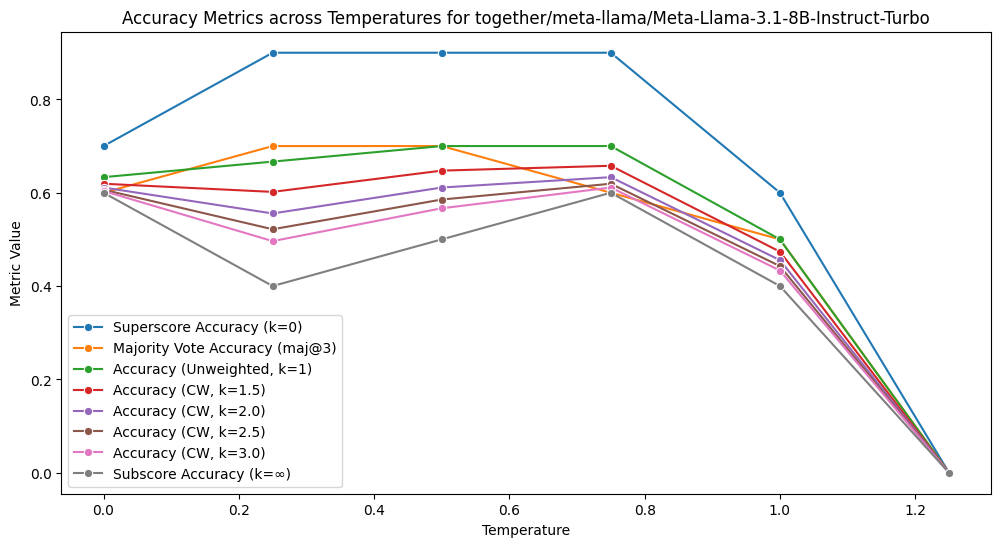

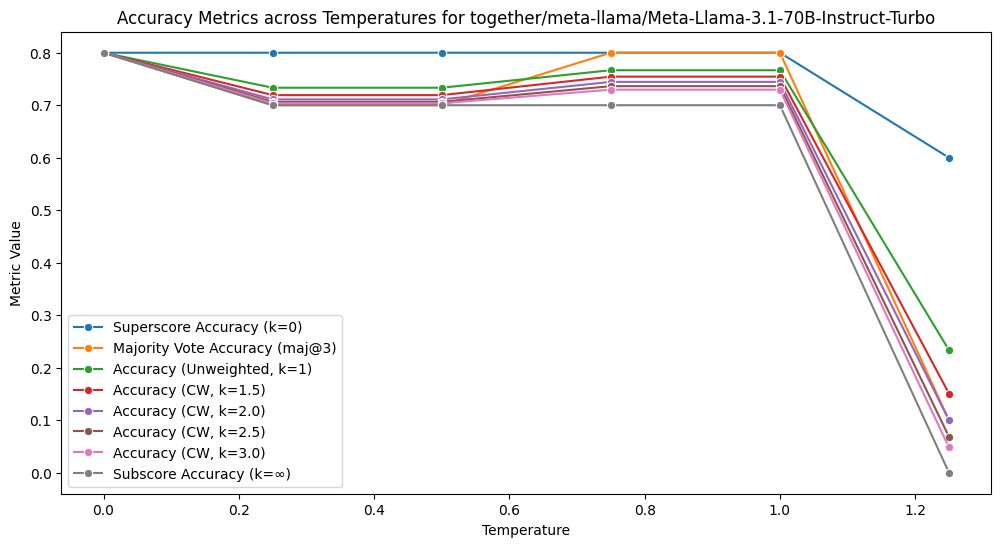

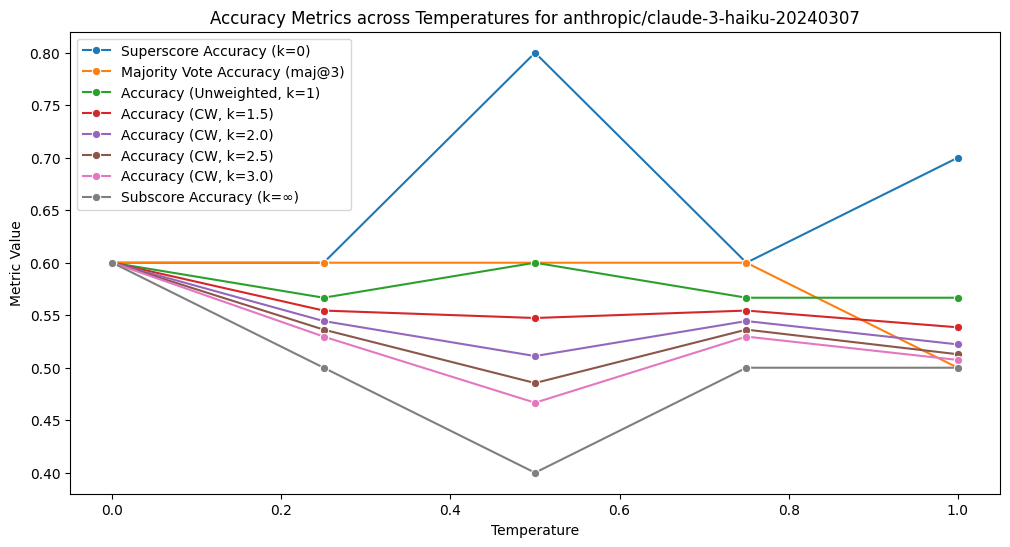

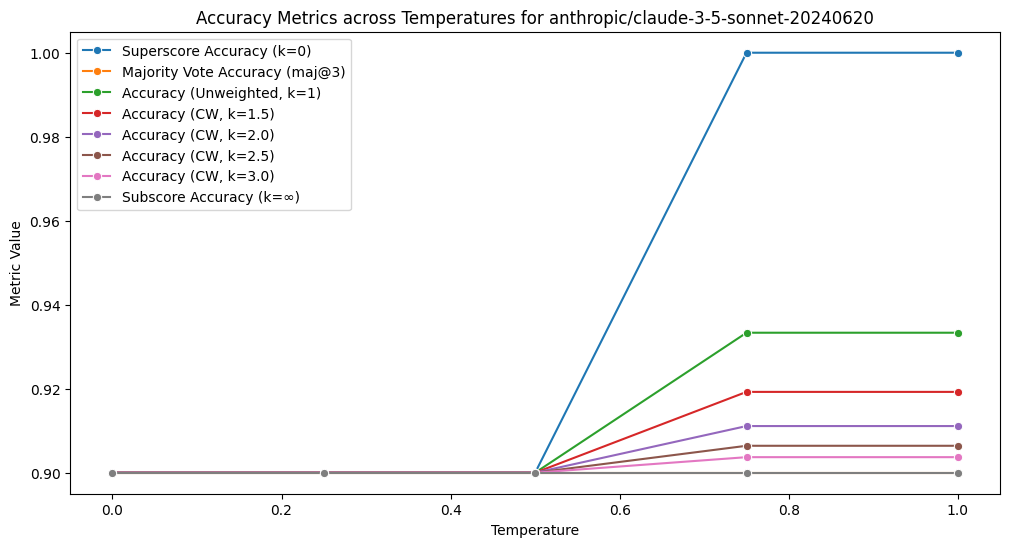

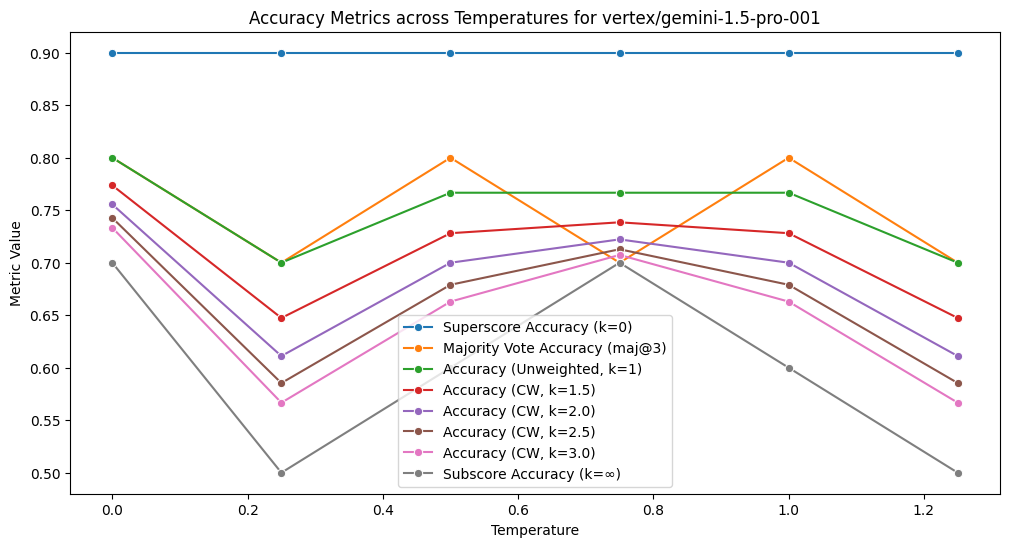

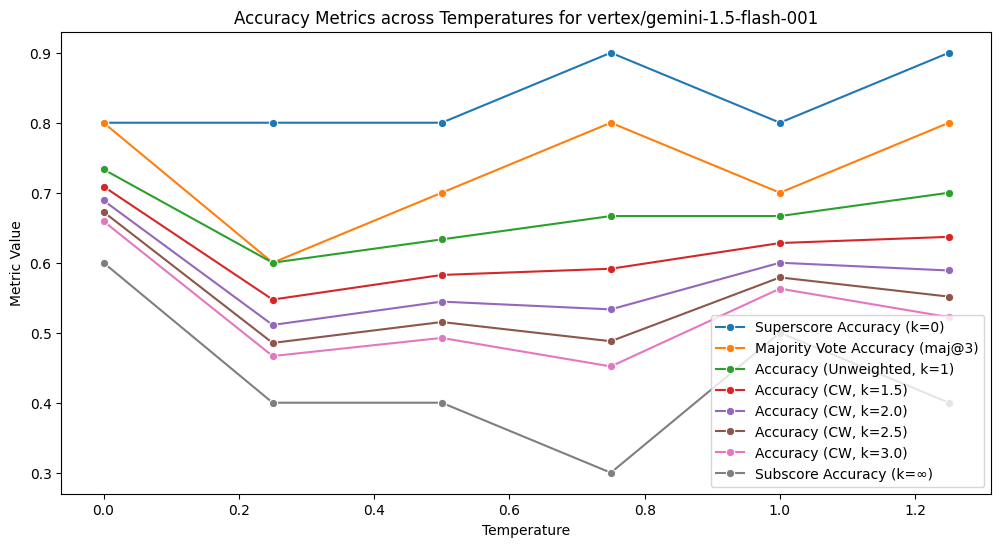

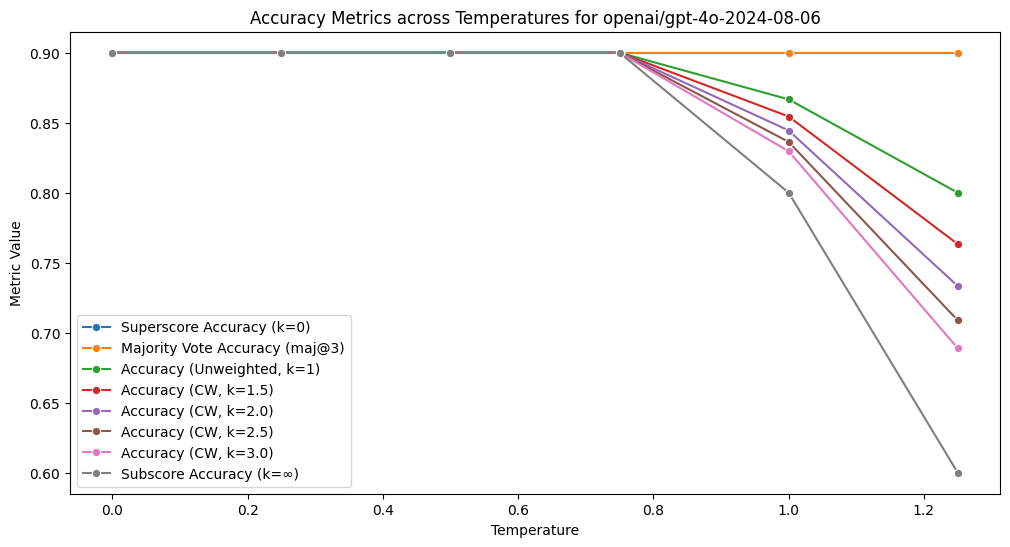

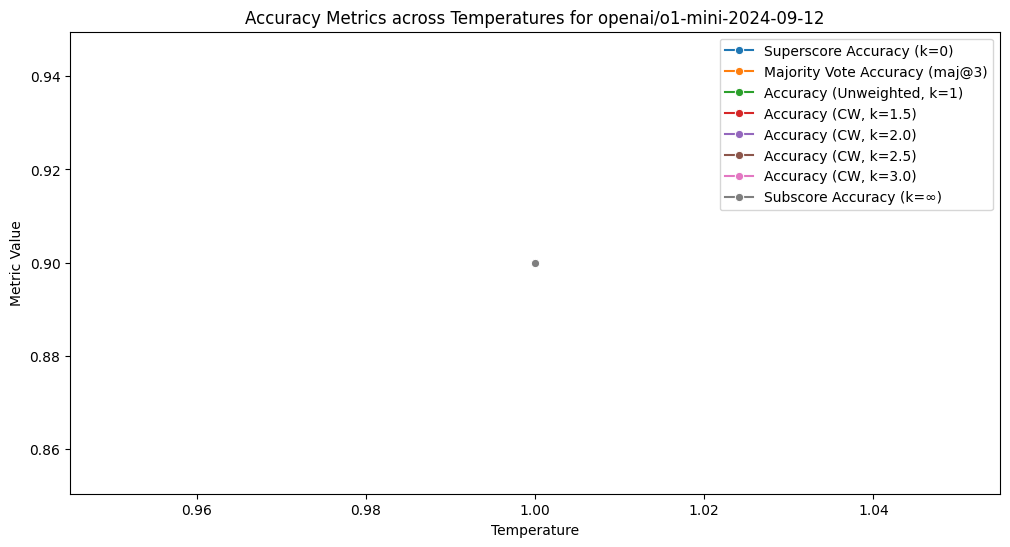

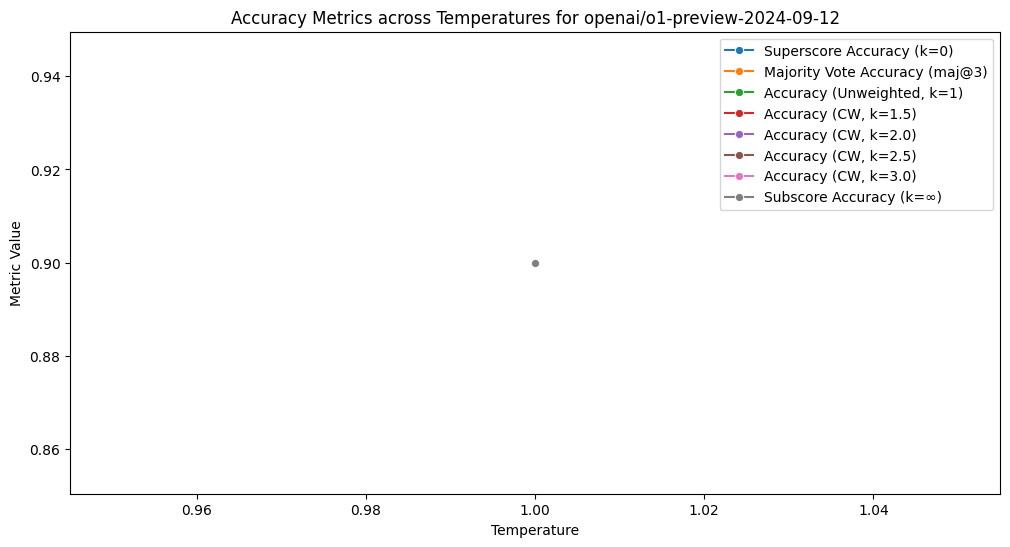

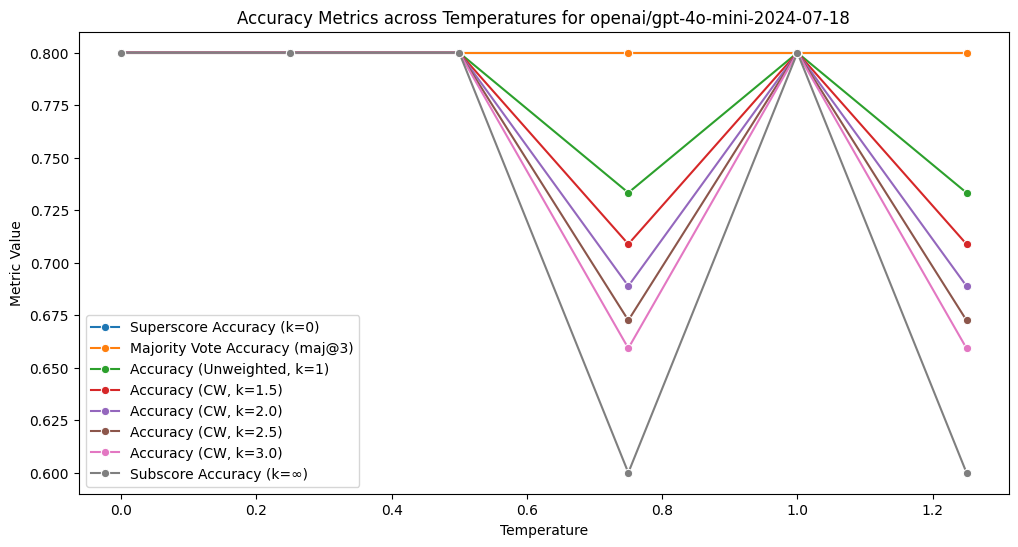

In [81]:
def plot_metrics_vs_temperature(df_metrics, llm_name):
    # Create a copy of the dataframe to avoid modifying the original
    df = df_metrics.copy()
    
    # Filter the dataframe for the specific LLM
    df_filtered = df[df['llm'] == llm_name]
    
    # Sort the dataframe by temperature to ensure correct order in the plot
    df_filtered = df_filtered.sort_values('temperature')
    
    # Create the plot
    plt.figure(figsize=(12, 6))
    
    # Plot Superscore Accuracy
    sns.lineplot(x='temperature', y='superscore_accuracy', data=df_filtered, marker='o', label='Superscore Accuracy (k=0)')
    
    # Plot Majority Vote Accuracy
    sns.lineplot(x='temperature', y='majority_vote_accuracy', data=df_filtered, marker='o', label=f'Majority Vote Accuracy (maj@{df_filtered["num_runs"].iloc[0]})')
    
    # Plot Unweighted Accuracy Mean (k=1)
    # sns.lineplot(x='temperature', y='accuracy_mean', data=df_filtered, marker='o', label='Unweighted Accuracy Mean (k=1)')
    
    # Plot Consistency-Weighted Accuracies for different k values
    k_values = [1.0, 1.5, 2.0, 2.5, 3.0]
    # k_values = [0.5, 1.0, 2.0, 2.5, 3.0]
    for k in k_values:
        if k == 1.0:
            sns.lineplot(x='temperature', y='accuracy_mean', data=df_filtered, marker='o', label='Accuracy (Unweighted, k=1)')
        else:
            sns.lineplot(
                x='temperature',
                y=f'consistency_weighted_accuracy_k{str(k)}',
                data=df_filtered,
                marker='o',
                label=f'Accuracy (CW, k={k})'
            )

    # Plot Subscore Accuracy
    sns.lineplot(x='temperature', y='subscore_accuracy', data=df_filtered, marker='o', label='Subscore Accuracy (k=∞)')
    
    # Customize the plot
    plt.title(f'Accuracy Metrics across Temperatures for {llm_name}')
    plt.xlabel('Temperature')
    plt.ylabel('Metric Value')
    plt.legend()
    
    # Show the plot
    plt.show()


for llm in df_metrics["llm"].unique():
    plot_metrics_vs_temperature(df_metrics, llm.replace("://", "/"))
